#Introdução






*   Sobre o que é esse projeto
*   fonte dados
*   Objetivo



# Metadados

1) Número de identificação 2) Diagnóstico (M = maligno, B = benigno) 3-32)
 Dez características de valor real são computadas para cada núcleo celular: a) raio (média das distâncias do centro aos pontos no perímetro) b) textura (desvio padrão dos valores da escala de cinza) c) perímetro d) área e) suavidade (variação local nos comprimentos do raio) f) compacidade (perímetro^2 / área - 1,0) g) concavidade (severidade das porções côncavas do contorno) h) pontos côncavos (número de porções côncavas do contorno) i) simetria j) dimensão fractal ("aproximação da linha costeira" - 1)



# Importando Bibliotecas

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Importando Dados

In [24]:
df = pd.read_csv('/breast_cancer_wisconsin_diagnostic.csv')

# Avaliando informações gerais


In [5]:
df.head()

,raio1,textura1,perimetro1,area1,suavidade1,compacidade1,concavidade1,pontos_concavos1,simetria1,dimensao_fractal1,...,textura3,perimetro3,area3,suavidade3,compacidade3,concavidade3,pontos_concavos3,simetria3,dimensao_fractal3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   raio1              569 non-null    float64
 1   textura1           569 non-null    float64
 2   perimetro1         569 non-null    float64
 3   area1              569 non-null    float64
 4   suavidade1         569 non-null    float64
 5   compacidade1       569 non-null    float64
 6   concavidade1       569 non-null    float64
 7   pontos_concavos1   569 non-null    float64
 8   simetria1          569 non-null    float64
 9   dimensao_fractal1  569 non-null    float64
 10  raio2              569 non-null    float64
 11  textura2           569 non-null    float64
 12  perimetro2         569 non-null    float64
 13  area2              569 non-null    float64
 14  suavidade2         569 non-null    float64
 15  compacidade2       569 non-null    float64
 16  concavidade2       569 non

In [7]:
df.describe()

,raio1,textura1,perimetro1,area1,suavidade1,compacidade1,concavidade1,pontos_concavos1,simetria1,dimensao_fractal1,...,raio3,textura3,perimetro3,area3,suavidade3,compacidade3,concavidade3,pontos_concavos3,simetria3,dimensao_fractal3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Exploração de dados

## Criando boxplot do raio1


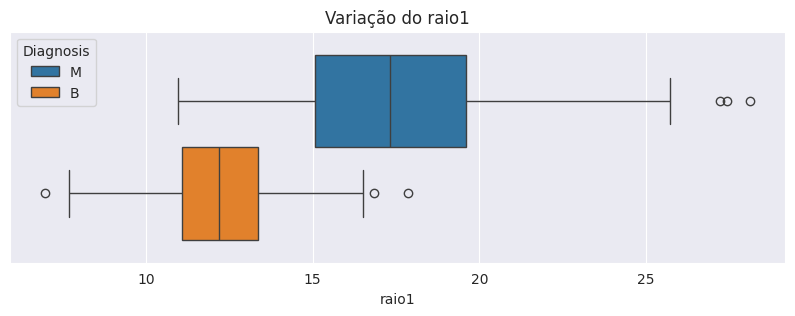

In [14]:
plt.figure(figsize=(10,3))
sns.set_style('darkgrid')
ax = sns.boxplot(x= 'raio1', hue= 'Diagnosis', data=df)
ax.set_title('Variação do raio1')
plt.show()

## Boxplot para todas as variáveis

In [18]:
variaveis = ['raio1', 'textura1', 'perimetro1', 'area1', 'suavidade1',
       'compacidade1', 'concavidade1', 'pontos_concavos1', 'simetria1',
       'dimensao_fractal1', 'raio2', 'textura2', 'perimetro2', 'area2',
       'suavidade2', 'compacidade2', 'concavidade2', 'pontos_concavos2',
       'simetria2', 'dimensao_fractal2', 'raio3', 'textura3', 'perimetro3',
       'area3', 'suavidade3', 'compacidade3', 'concavidade3',
       'pontos_concavos3', 'simetria3', 'dimensao_fractal3']

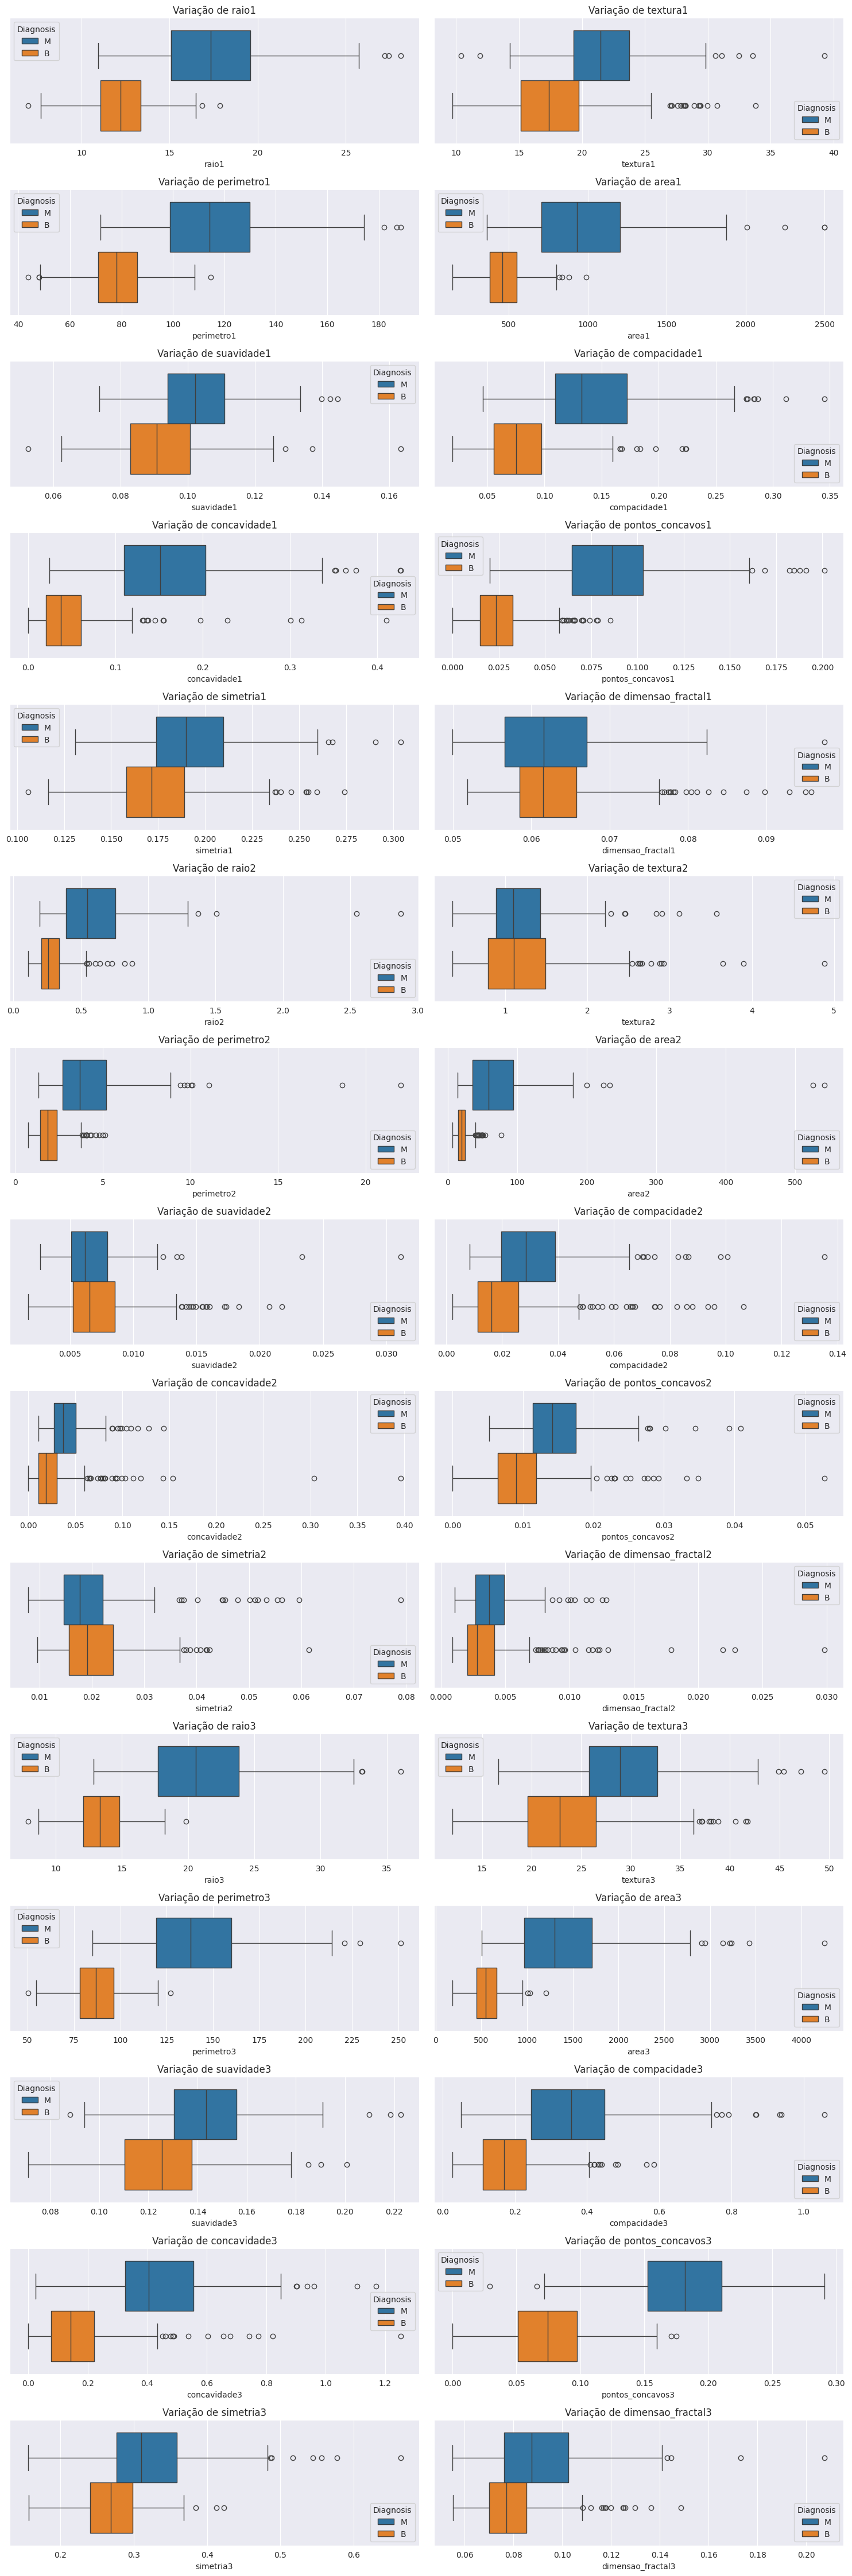

In [20]:
# Cria a figura com 15 linhas e 2 colunas (totalizando 30 subplots)
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(15, 45))  # Ajuste o tamanho como necessário
axes = axes.ravel()  # Transforma a matriz de eixos em uma lista para fácil iteração
# Loop para criar cada gráfico
for i, var in enumerate(variaveis):
    sns.boxplot(x=var, hue = 'Diagnosis', data=df, ax = axes[i])
    axes[i].set_title(f'Variação de {var}')
# Ajusta o layout para evitar sobreposição de títulos e labels
plt.tight_layout()
plt.show()

# Pre Processamento

 - Como foi verificado, não há dados faltantes no nosso dataset
 - Então, vamos precisar:
  - Fazer encoding
  - Separar em treino e teste

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   raio1              569 non-null    float64
 1   textura1           569 non-null    float64
 2   perimetro1         569 non-null    float64
 3   area1              569 non-null    float64
 4   suavidade1         569 non-null    float64
 5   compacidade1       569 non-null    float64
 6   concavidade1       569 non-null    float64
 7   pontos_concavos1   569 non-null    float64
 8   simetria1          569 non-null    float64
 9   dimensao_fractal1  569 non-null    float64
 10  raio2              569 non-null    float64
 11  textura2           569 non-null    float64
 12  perimetro2         569 non-null    float64
 13  area2              569 non-null    float64
 14  suavidade2         569 non-null    float64
 15  compacidade2       569 non-null    float64
 16  concavidade2       569 non

In [25]:
# Encodando a coluna target( Diagnosis)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [23]:
df['Diagnosis']

,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [26]:
df.head()

,raio1,textura1,perimetro1,area1,suavidade1,compacidade1,concavidade1,pontos_concavos1,simetria1,dimensao_fractal1,...,textura3,perimetro3,area3,suavidade3,compacidade3,concavidade3,pontos_concavos3,simetria3,dimensao_fractal3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# Separando em treino e teste

In [45]:
X= df.drop('Diagnosis', axis=1)
y= df['Diagnosis']

In [30]:
x.head()

,raio1,textura1,perimetro1,area1,suavidade1,compacidade1,concavidade1,pontos_concavos1,simetria1,dimensao_fractal1,...,raio3,textura3,perimetro3,area3,suavidade3,compacidade3,concavidade3,pontos_concavos3,simetria3,dimensao_fractal3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
y

,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [37]:
# separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
print(f'X_train:{X_train.shape}')
print(f'X_test:{X_test.shape}')
print(f'y_train:{y_train.shape}')
print(f'y_test:{y_test.shape}')

X_train:(455, 30)
X_test:(114, 30)
y_train:(455,)
y_test:(114,)


# Criando modelo de arvore de Decisão

In [36]:
clf = DecisionTreeClassifier(random_state=42)

In [39]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
nomes_variaveis = X.columns

[Text(0.6145833333333334, 0.9375, 'pontos_concavos1 <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3958333333333333, 0.8125, 'raio3 <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.5052083333333334, 0.875, 'True  '),
 Text(0.2916666666666667, 0.6875, 'area2 <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.20833333333333334, 0.5625, 'suavidade3 <= 0.178\ngini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.16666666666666666, 0.4375, 'suavidade2 <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [257, 2]'),
 Text(0.08333333333333333, 0.3125, 'textura3 <= 27.755\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3125, 'textura3 <= 33.35\ngini = 0.008\nsamples = 252\nvalue = [251, 1]'),
 Text(0.20833333333333334, 0.1875, 'gini = 0.0\nsamples = 237\nvalue = [237, 0]'),
 Text(0.29166

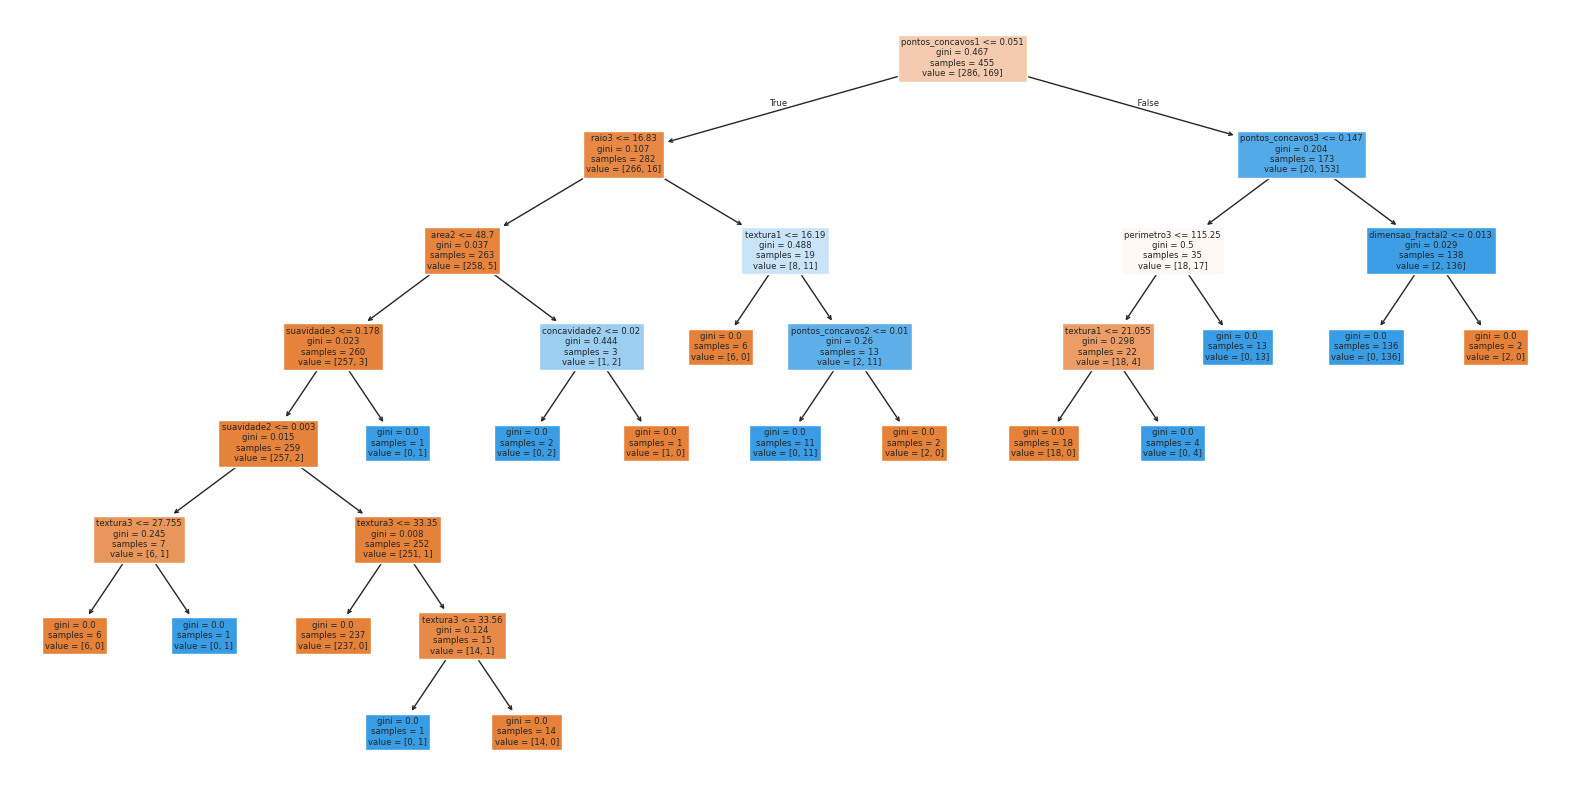

In [47]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=nomes_variaveis, filled=True)

# Fazendo predições

In [60]:
y_test.iloc[1]

1

In [59]:
X_teste.iloc[1]

,70
raio1,18.940000
textura1,21.310000
perimetro1,123.600000
area1,1130.000000
suavidade1,0.090090
compacidade1,0.102900
concavidade1,0.108000
pontos_concavos1,0.079510
simetria1,0.158200
dimensao_fractal1,0.054610


In [49]:
y_pred = clf.predict(X_test)

In [50]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

# Metricas do modelo

In [56]:
# acuracia, recall, precissão
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [55]:
print(f'Acurácia: {accuracy}')
print(f'Recall: {recall}')
print(f'Precisão: {precision}')

Acurácia: 0.9473684210526315
Recall: 0.9302325581395349
Precisão: 0.9302325581395349


In [53]:
accuracy

0.9473684210526315

In [51]:
list(y_test)

[0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1]